<a href="https://colab.research.google.com/github/priebet/sentiment/blob/master/sentiment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter-Sentimentanalyse Teil 5
## Visualisierung der Ergebnisse 

In [0]:
# Mount Google Drive for easy and fast read/write access to data folder 
#from google.colab import drive
#drive.mount('/content/drive')
#datapath = "/content/drive/My Drive/Colab Notebooks/data/"

In [0]:
# For demonstration purposes, pull data from webserver instead
datapath = "http://priebe.onl/data/"

In [0]:
import pandas as pd  
import numpy as np

In [4]:
# Load resulting dataset of Brexit tweets with sentiment 
df = pd.read_csv(datapath+"brexit_sentiment.csv")
df.head()

,sentiment,id,created,hashtags
0,0.235443,736284933686239233,2016-05-27T19:56:22,brexit
1,0.978828,736284905710211073,2016-05-27T19:56:15,euref|strongerin|brexit|brexin
2,0.767239,736284877084065792,2016-05-27T19:56:08,brexit|voteremain|voteleave
3,0.430086,736284846151106563,2016-05-27T19:56:01,brexit
4,0.795538,736284840992092160,2016-05-27T19:56:00,brexit|euref


Total number of tweets is 865549 entries


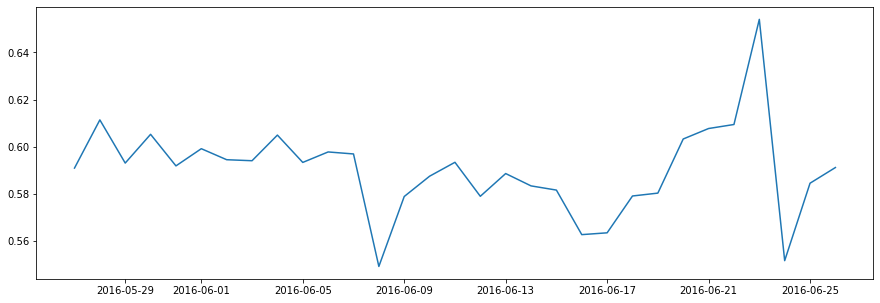

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Register datetime converter and convert created column
pd.plotting.register_matplotlib_converters()
df['created'] = pd.to_datetime(df['created'])

print("Total number of tweets is {0} entries".format(len(df)))
# Aggregate data by calculating average sentiment per day and visualize
df_grouped = df[['created','sentiment']].set_index('created').groupby(pd.Grouper(freq='D')).mean()
plt.figure(figsize=(15,5))
plt.plot_date(df_grouped.index, df_grouped['sentiment'], fmt='-')

Subset of tweets with 'remain' hashtags 163825 entries
Subset of tweets with 'leave' hashtags 157189 entries


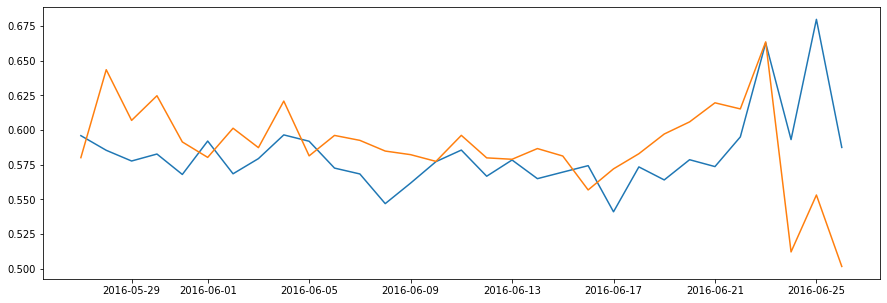

In [6]:
# Calculate subset of tweets with "pro-leave" hashtags
df_leave = df.loc[df['hashtags'].str.contains('leave|takecontrol|voteout') & 
                  ~df['hashtags'].str.contains('remain|strongerin|votein')]
print("Subset of tweets with 'remain' hashtags {0} entries".format(len(df_leave)))
df_leave_grouped = df_leave[['created','sentiment']].set_index('created').groupby(pd.Grouper(freq='D')).mean()

# Calculate subset of tweets with "pro-remain" hashtags
df_remain = df.loc[df['hashtags'].str.contains('remain|strongerin|votein') & 
                   ~df['hashtags'].str.contains('leave|takecontrol|voteout')]
print("Subset of tweets with 'leave' hashtags {0} entries".format(len(df_remain)))
df_remain_grouped = df_remain[['created','sentiment']].set_index('created').groupby(pd.Grouper(freq='D')).mean()

# Visualize both subsets in one graph
plt.figure(figsize=(15,5))
plt.plot_date(df_leave_grouped.index, df_leave_grouped['sentiment'], fmt='-')
plt.plot_date(df_remain_grouped.index, df_remain_grouped['sentiment'], fmt='-')